<center>IE 7300: Statistical Learning for Engineering</center>

### <center>Superconductivity Materials and Critical Temperature</center>

<center>Youyu Zhang</center>
<center>zhang.youy@northeastern.edu</center>
<center>(530)574-2826</center>
<center>Submitted by 10/25/2022</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pickle
import os

In [2]:
# Import dataset. Critical temperature unit: K
dataset = pd.read_csv('train.csv')       # Main feature dataset
formula = pd.read_csv('unique_m.csv')    # Formula of materials.

In [3]:
dataset.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [4]:
formula.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


Check if the two datsets have same number of cases.

In [5]:
dataset.shape[0] == formula.shape[0]

True

In [6]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [7]:
dataset.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

Save basic info into csv file


In [8]:
dataset_summary = {
    'Ind': list(range(dataset.shape[1])),
    'Column Name': dataset.columns,
    'Data Type': dataset.dtypes}
d_summary = pd.DataFrame(data = dataset_summary)
d_summary.head()

# d_summary.to_csv('ColumnSummary.csv',index=False)

,Ind,Column Name,Data Type
number_of_elements,0,number_of_elements,int64
mean_atomic_mass,1,mean_atomic_mass,float64
wtd_mean_atomic_mass,2,wtd_mean_atomic_mass,float64
gmean_atomic_mass,3,gmean_atomic_mass,float64
wtd_gmean_atomic_mass,4,wtd_gmean_atomic_mass,float64


#### EDA
1. Check null values for each column. No null values exist in the given dataset.
2. Check if the target variable ['critical_temp'] has a patterned distribution.
3. Explore the similarity between columns with similiar functions. 
4. Check if multi-collinearity exists.

In [9]:
null_list = {}
for i in dataset.columns:
    null_list[i] = dataset[i].isnull().sum()
    if null_list[i] != 0:
        print(null_list[i])

In [10]:
element = formula.columns
element

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn', 'critical_temp', 'material'],
      dtype='object')

In [11]:
y = dataset["critical_temp"]
x = dataset.iloc[:,0:dataset.shape[1]-1]
x.shape

(21263, 81)

Check if key variables are normally distributed.

Following figures shows that the values are not normally distributed, especially for critical temperature. Most of the critical temperature (Y) are low to almost 0K, which is the absolute temperature. As we are looking for the high critical temperature opportunities, we will focus on high critical temperature examples.

c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0.5, 1.0, 'wtd_mean_FusionHeat')

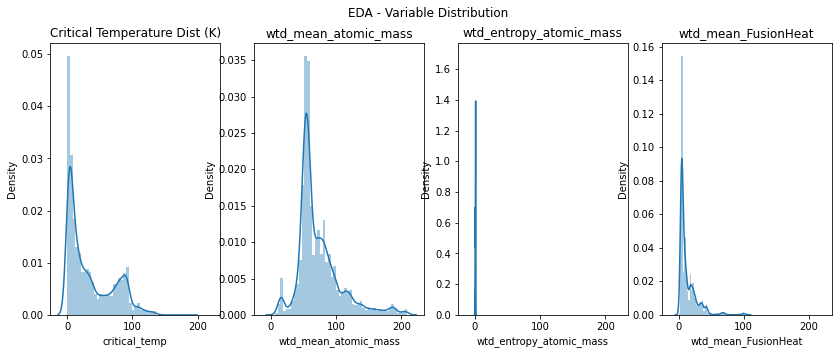

In [12]:
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(14,5))
fig.suptitle('EDA - Variable Distribution')

sns.distplot(ax=axes[0],a=y)
axes[0].set_title("Critical Temperature Dist (K)")
sns.distplot(ax=axes[1],a=x['wtd_mean_atomic_mass'])
axes[1].set_title("wtd_mean_atomic_mass")
sns.distplot(ax=axes[2],a=x['wtd_entropy_atomic_mass'])
axes[2].set_title("wtd_entropy_atomic_mass")
sns.distplot(ax=axes[3],a=x['wtd_mean_FusionHeat'])
axes[3].set_title("wtd_mean_FusionHeat")

In [94]:
x['wtd_std_Valence']

0        0.437059
1        0.468606
2        0.444697
3        0.440952
4        0.428809
           ...   
21258    0.496904
21259    0.212959
21260    0.400000
21261    0.462493
21262    1.500000
Name: wtd_std_Valence, Length: 21263, dtype: float64

Although the column names looks alike, the values are not 100% linearly related. Following figures indicated the differences between similiar features.

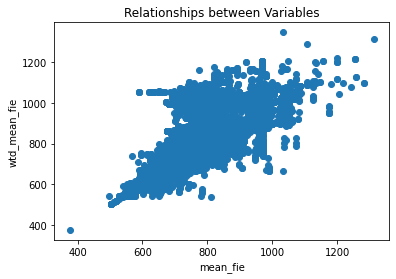

In [13]:
plt.scatter(x['mean_fie'],x['wtd_mean_fie'])
plt.title('Relationships between Variables')
plt.xlabel('mean_fie')
plt.ylabel('wtd_mean_fie')
plt.show()

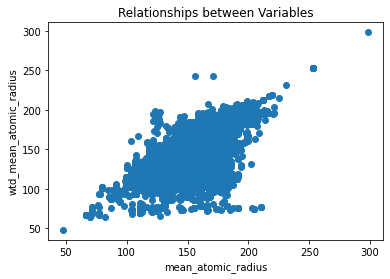

In [14]:
plt.scatter(x['mean_atomic_radius'],x['wtd_mean_atomic_radius'])
plt.title('Relationships between Variables')
plt.xlabel('mean_atomic_radius')
plt.ylabel('wtd_mean_atomic_radius')
plt.show()

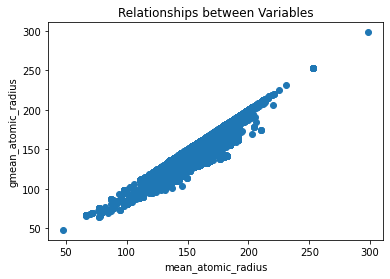

In [15]:
plt.scatter(x['mean_atomic_radius'],x['gmean_atomic_radius'])
plt.title('Relationships between Variables')
plt.xlabel('mean_atomic_radius')
plt.ylabel('gmean_atomic_radius')
plt.show()

The atomic radius and density relationship is illustrated below. For smaller atoms, the radius and density are positive related. Meanwhile for larger atoms, the radius and density form a negative relationship. And the highest density atoms usually has atomic radius around 180. 

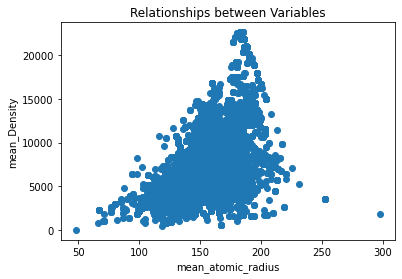

In [16]:
plt.scatter(x['mean_atomic_radius'],x['mean_Density'])
plt.title('Relationships between Variables')
plt.xlabel('mean_atomic_radius')
plt.ylabel('mean_Density')
plt.show()

The standard deviation of atomic mass and critical temperature (Y) do not have any obvious relationship.

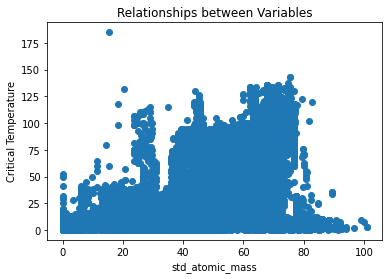

In [17]:
plt.scatter(x['std_atomic_mass'],y)
plt.title('Relationships between Variables')
plt.xlabel('std_atomic_mass')
plt.ylabel('Critical Temperature')
plt.show()

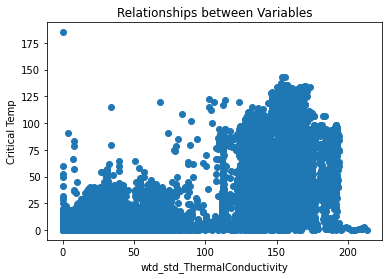

In [18]:
plt.scatter(x['wtd_std_ThermalConductivity'],y)
plt.title('Relationships between Variables')
plt.xlabel('wtd_std_ThermalConductivity')
plt.ylabel('Critical Temp')
plt.show()

The plot above indicated that the critical temperature (Y) is not normally distributed.

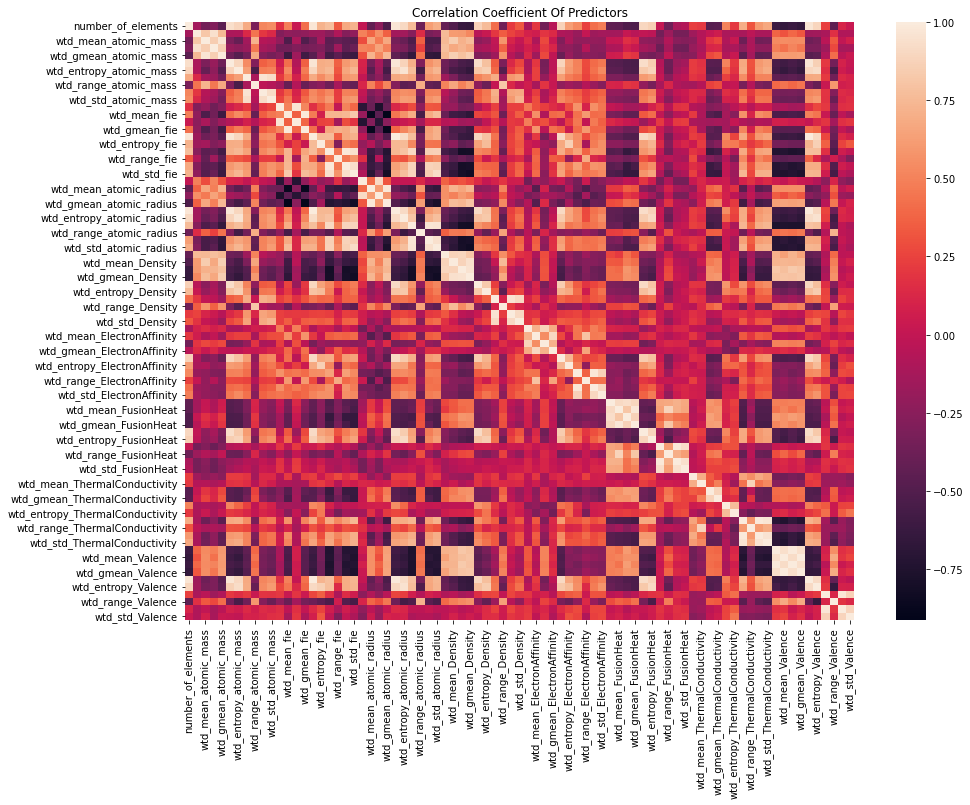

In [19]:
plt.figure(figsize=(15,11))
sns.heatmap(x.corr())
plt.title('Correlation Coefficient Of Predictors')
plt.show()

From the plot above we can see that some of the variables are linearly correlated. Those repetitive columns do not need to be removed because they will not affect the modeling part.

### Modeling and Feature Selection

First method is Lasso regression, which both result continuous prediction and works well on feature selection. 

#### Lasso Regression

In [20]:
# Add penalty part for linear regression, ridge and lasso. 
# Thos class would be called inside the linear regression. 
class Linear:
    def __init__(self, alpha):
        self.a = alpha
    def cost(self,w):
        return 0
    def derivation(self, w):
        return 0
        
class RidgePenalty: 
    """   
    This class defines ridge regression penalty, which make it different than lasso. 
    """
    def __init__(self, alpha):
        self.a = alpha
    def cost(self, w):
        return self.a*np.sum(np.square(w))
    def derivation(self, w):
        return 2*self.a*w


class LassoPenalty:
    """
    This class defines lasso regression penalty.
    """
    def __init__(self, alpha):
        self.a = alpha
    def cost(self,w):
        return self.a*np.sum(np.abs(w))
    def derivation(self, w):
        return self.a*np.sign(w)

In [21]:
class LinearRegression():
    """
    Suggestion: scaling x before train.
    This class is used for multivariate linear regression.
    """
    def __init__(self,x:pd.DataFrame,y:pd.Series,
                 lr:float,epo:int, alpha:float =0,
                 regulation=Linear):
        self.x = x
        self.y = y
        self.w = np.zeros(x.shape[1])
        self.b = 0
        self.lr = lr
        self.epo = epo
        self.alpha = alpha
        self.regularization = regulation
    
    def loss_function(self):
        loss = 0
        n = len(self.y)
        for i in range(n):
            loss += (self.y[i]-(np.dot(self.w,self.x[i])+self.b))**2
        return loss/2/float(n)
    
    def gradient_descend(self):
        z = self.x.dot(self.w) + self.b
        loss = z - self.y
        
        weight_gradient = self.x.T.dot(loss) / len(self.y)
        bias_gradient = np.sum(loss) / len(self.y)
        # Ridge or lasso will add this part
        reg = self.regularization(alpha=self.alpha)
        weight_gradient = self.x.T.dot(loss) / len(self.y)+reg.derivation(self.w)
        # reg = self.regularization(alpha=self.alpha)
        # weight_gradient = self.x.T.dot(loss) / len(self.y)+reg.derivation(self.w)

        self.w = np.array(self.w - self.lr*weight_gradient)
        self.b = self.b - self.lr*bias_gradient
        return self.w, self.b
    
    def train(self):
        """
        w: input slope trial starting point
        b: input intersect trial starting point
        learning rate: suggested from 0.001 to 0.05
        epochs: suggested larger than 100
        """
        cost_list = [0] * self.epo
        for epoch in range(self.epo):
            self.w, self.b = self.gradient_descend()
            cost = self.loss_function()
            cost_list[epoch] = cost
            if (epoch%(self.epo/5)==0):
                print("Cost at epoch",epoch,"is:",cost)
        print(f"w = {self.w}, b = {self.b}")
        return self.w, self.b, cost_list

    def predict(self,x):
        return np.dot(x,self.w) + self.b


Normalization of the data.

In [22]:
from sklearn.preprocessing import StandardScaler, Normalizer

scaler = StandardScaler().fit(np.array(x))
scaled_x = scaler.transform(x)

In [23]:
lasso =LinearRegression(scaled_x,np.array(y),lr=1e-2,alpha=0.1,epo=1000,regulation=LassoPenalty)
lasso.train()
y_pred_train = lasso.predict(scaled_x)
cost_train = (y-y_pred_train)**2
prediction = pd.DataFrame({"Y": y, "Y_predict": y_pred_train,"cost":cost_train})

Cost at epoch 0 is: 1022.9289058057861
Cost at epoch 200 is: 215.04868670146095
Cost at epoch 400 is: 192.2016712778158
Cost at epoch 600 is: 185.97877893555142
Cost at epoch 800 is: 182.58728458635193
w = [ 1.83637335e+00  1.05844752e+00  4.68175453e-04  6.45706183e-02
  9.40770339e-01 -1.01872696e+00  4.46880592e+00  5.05119701e+00
 -1.92711406e+00  2.72597078e+00 -2.96073885e+00  1.09270215e+00
  1.79538749e-04  1.55563034e+00  6.14684069e-04  8.43013013e-04
  2.37506744e-01  1.56678496e+00  3.20913683e-04 -6.36177883e-01
 -9.43078851e-01 -1.74610679e-04  2.84669844e+00 -4.95500670e-01
  6.51405842e-01  4.67344495e-04  2.55320356e+00  4.64478259e+00
 -2.45509859e+00  9.08048940e-01  1.42849297e+00 -2.17240009e+00
 -3.44495880e-04 -1.86267033e+00  3.15286014e-05 -1.05346173e+00
 -1.83760662e+00 -1.37786630e-01  2.14443768e+00 -2.71696345e-02
 -2.65330818e+00  1.16745977e+00  6.94214434e-01  5.02342311e-03
 -4.08452253e+00 -2.81981619e+00 -5.50840618e+00 -1.31762822e+00
 -2.00482773e+

In [24]:
prediction

,Y,Y_predict,cost
0,29.00,39.355187,107.229898
1,26.00,41.458940,238.978831
2,19.00,36.480048,305.552068
3,22.00,37.985621,255.540075
4,23.00,41.802655,353.539818
...,...,...,...
21258,2.44,25.508538,532.157456
21259,122.10,85.794238,1318.108387
21260,1.98,-3.411208,29.065120
21261,1.84,-3.123802,24.639328


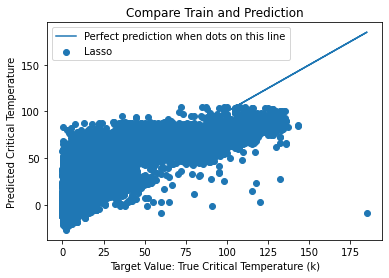

In [25]:
plt.scatter(prediction['Y'], prediction['Y_predict'], label='Lasso')
plt.plot(prediction['Y'], prediction['Y'], label='Perfect prediction when dots on this line')
plt.legend(loc="upper left")
plt.title('Compare Train and Prediction')
plt.xlabel('Target Value: True Critical Temperature (k)')
plt.ylabel('Predicted Critical Temperature')
plt.show()

Feature Selection:

Use Lasso model result and importance to select the appropriate features. 

Re-use the same model with limited features to predict the critical temperature again.

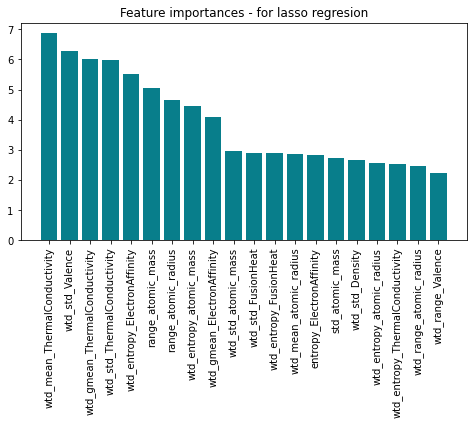

In [26]:
# Lasso Feature Importance

dfX = pd.DataFrame(x,columns=x.columns)
lassoImportantfeatures = pd.DataFrame(data={'feature': dfX.columns})
lassoImportantfeatures["importance"] = np.abs(pd.DataFrame(lasso.w))
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,4))
plt.bar(x=lassoImportantfeatures['feature'].iloc[0:20], 
    height=lassoImportantfeatures['importance'].iloc[0:20], 
    color='#087E8B')
plt.title('Feature importances - for lasso regresion')
plt.xticks(rotation='vertical')
plt.show()

In [27]:
lassoImportantfeatures.iloc[0:10]

,feature,importance
62,wtd_mean_ThermalConductivity,6.874648
80,wtd_std_Valence,6.278730
64,wtd_gmean_ThermalConductivity,6.002457
70,wtd_std_ThermalConductivity,5.973381
46,wtd_entropy_ElectronAffinity,5.508406
7,range_atomic_mass,5.051197
27,range_atomic_radius,4.644783
6,wtd_entropy_atomic_mass,4.468806
44,wtd_gmean_ElectronAffinity,4.084523
10,wtd_std_atomic_mass,2.960739


In [28]:
features = np.array(lassoImportantfeatures[lassoImportantfeatures['importance']>=2.95]['feature'])

lassoImportantfeatures[lassoImportantfeatures['importance']>=2]

,feature,importance
62,wtd_mean_ThermalConductivity,6.874648
80,wtd_std_Valence,6.278730
64,wtd_gmean_ThermalConductivity,6.002457
70,wtd_std_ThermalConductivity,5.973381
46,wtd_entropy_ElectronAffinity,5.508406
7,range_atomic_mass,5.051197
27,range_atomic_radius,4.644783
6,wtd_entropy_atomic_mass,4.468806
44,wtd_gmean_ElectronAffinity,4.084523
10,wtd_std_atomic_mass,2.960739


From the important features above, we can see that the most important properties: 

ThermalConductivity, Valence, ElectronAffinity, range of atomic mass (and range of atomic radius are highly correlated). 

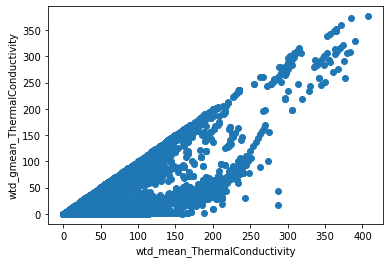

In [29]:
plt.scatter(x.wtd_mean_ThermalConductivity, x.wtd_gmean_ThermalConductivity)
plt.xlabel('wtd_mean_ThermalConductivity')
plt.ylabel('wtd_gmean_ThermalConductivity')
plt.show()

In [30]:
features = np.array(lassoImportantfeatures[lassoImportantfeatures['importance']>=2.95]['feature'])
x_selected = x[features]
scaler_selected = StandardScaler().fit(np.array(x_selected))
scaled_x_selected = scaler_selected.transform(x_selected)

In [31]:
lasso_selected =LinearRegression(scaled_x_selected,np.array(y),
    lr=1e-2,alpha=0.05,epo=1000,regulation=LassoPenalty)
lasso_selected.train()
y_pred_train_lassoselected = lasso_selected.predict(scaled_x_selected)
cost_train_lassoselected = (y-y_pred_train_lassoselected)**2
prediction_lassoselected = pd.DataFrame({"Y": y, "Y_predict": y_pred_train_lassoselected,
                            "cost":cost_train_lassoselected})

Cost at epoch 0 is: 1142.5228037106515
Cost at epoch 200 is: 219.9909223656339
Cost at epoch 400 is: 205.6540815373324
Cost at epoch 600 is: 203.66499348036825
Cost at epoch 800 is: 202.38414996652793
w = [ 9.11913613 -4.54911957 -7.73079197  6.44419668 -4.1732212   6.9814325
  6.47466614  6.14091987 -5.89729853 -3.51834952], b = 34.41973312838502


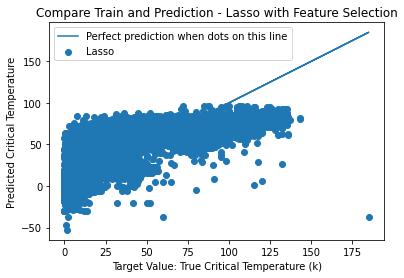

In [32]:
plt.scatter(prediction_lassoselected['Y'], 
    prediction_lassoselected['Y_predict'], 
    label='Lasso')
plt.plot(prediction_lassoselected['Y'],
    prediction_lassoselected['Y'], 
    label='Perfect prediction when dots on this line')
plt.legend(loc="upper left")
plt.title('Compare Train and Prediction - Lasso with Feature Selection')
plt.xlabel('Target Value: True Critical Temperature (k)')
plt.ylabel('Predicted Critical Temperature')
plt.show()

The feature selection improves a little bit on the cost of each epoch.

In [33]:
rmse_train_lassoselected = np.sqrt(sum(cost_train_lassoselected)/len(cost_train_lassoselected))
r2_train_lassoselected = 1-sum(cost_train_lassoselected)/sum((np.array(y)-sum(np.array(y))/len(np.array(y)))**2)

print(f'RMSE of Lasso model on training dataset = {round(rmse_train_lassoselected,3)}')
print(f'R2 score = {round(r2_train_lassoselected,4)}')

RMSE of Lasso model on training dataset = 20.069
R2 score = 0.6567


In [34]:
cost_train_lassoselected

0         166.328366
1         211.928025
2         449.041218
3         364.354644
4         413.075792
            ...     
21258     991.104753
21259    1717.317945
21260      34.325800
21261      33.756114
21262      99.337341
Name: critical_temp, Length: 21263, dtype: float64

#### Decision Tree Regressor

In [35]:
#imports
from abc import ABC,abstractmethod
import numpy as np

#class to control tree node
class Node:
    #initializer
    def __init__(self):
        self.__Bs    = None
        self.__Bf    = None
        self.__left  = None
        self.__right = None
        self.leafv   = None

    #set the split,feature parameters for this node
    def set_params(self,Bs,Bf):
        self.__Bs = Bs
        self.__Bf = Bf
        
    #get the split,feature parameters for this node
    def get_params(self):
        return(self.__Bs,self.__Bf)    
        
    #set the left/right children nodes for this current node
    def set_children(self,left,right):
        self.__left  = left
        self.__right = right
        
    #get the left child node
    def get_left_node(self):
        return(self.__left)
    
    #get the right child node
    def get_right_node(self):
        return(self.__right)

#base class to encompass the decision tree algorithm
class DecisionTree(ABC):
    #initializer
    def __init__(self,max_depth=None,min_samples_split=2):
        self.tree              = None
        self.max_depth         = max_depth
        self.min_samples_split = min_samples_split
        
    #protected function to define the impurity
    @abstractmethod
    def _impurity(self,D):
         pass
        
    #protected function to compute the value at a leaf node
    @abstractmethod
    def _leaf_value(self,D):
         pass
        
    #private recursive function to grow the tree during training
    def __grow(self,node,D,level):       
        #are we in a leaf node? let's do some check...
        depth = (self.max_depth is None) or (self.max_depth >= (level+1))
        msamp = (self.min_samples_split <= D.shape[0])
        n_cls = np.unique(D[:,-1]).shape[0] != 1
        
        #not a leaf node
        if depth and msamp and n_cls:
        
            #initialize the function parameters
            ip_node = None
            feature = None
            split   = None
            left_D  = None
            right_D = None
            #determine the possible features on which we can split
            features = np.random.choice([i for i in range(D.shape[1]-1)],size=int(np.sqrt(D.shape[1]-1)),replace=False)
            #iterrate through the possible feature/split combinations
            for f in features:
                for s in np.unique(D[:,f]):
                    #for the current (f,s) combination, split the dataset
                    D_l = D[D[:,f]<=s]
                    D_r = D[D[:,f]>s]
                    #ensure we have non-empty arrays, otherwise treat as a leaf node
                    if D_l.size and D_r.size:
                        #calculate the impurity
                        ip  = (D_l.shape[0]/D.shape[0])*self._impurity(D_l) + (D_r.shape[0]/D.shape[0])*self._impurity(D_r)
                        #now update the impurity and choice of (f,s)
                        if (ip_node is None) or (ip < ip_node):
                            ip_node = ip
                            feature = f
                            split   = s
                            left_D  = D_l
                            right_D = D_r    
            #check if valid parameters were found? If not, treat this as a leaf node & return
            if (split is None) or (feature is None) or (left_D is None) or (right_D is None):
                node.leafv = self._leaf_value(D)
                return
            #set the current node's parameters
            node.set_params(split,feature)
            #declare child nodes
            left_node  = Node()
            right_node = Node()
            node.set_children(left_node,right_node)
            #investigate child nodes
            self.__grow(node.get_left_node(),left_D,level+1)
            self.__grow(node.get_right_node(),right_D,level+1)
                        
        #is a leaf node
        else:
            
            #set the node value & return
            node.leafv = self._leaf_value(D)
            return
     
    #private recursive function to traverse the (trained) tree
    def __traverse(self,node,Xrow):
        #check if we're in a leaf node?
        if node.leafv is None:
            #get parameters at the node
            (s,f) = node.get_params()
            #decide to go left or right?
            if (Xrow[f] <= s):
                return(self.__traverse(node.get_left_node(),Xrow))
            else:
                return(self.__traverse(node.get_right_node(),Xrow))
        else:
            #return the leaf value
            return(node.leafv)
    
    #train the tree model
    def fit(self,Xin,Yin):
        #prepare the input data
        D = np.concatenate((Xin,Yin.reshape(-1,1)),axis=1)
        #set the root node of the tree
        self.tree = Node()
        #build the tree
        self.__grow(self.tree,D,1)
        
    #make predictions from the trained tree
    def predict(self,Xin):
        #iterrate through the rows of Xin
        p = []
        for r in range(Xin.shape[0]):
            p.append(self.__traverse(self.tree,Xin[r,:]))
        #return predictions
        return(np.array(p).flatten())


class DecisionTreeRegressor(DecisionTree):
    #initializer
    def __init__(self,max_depth=None,min_samples_split=2,loss='mse'):
        super().__init__(max_depth,min_samples_split)
        self.loss              = loss   
    
    #private function to define the mean squared error
    def __mse(self,D):
        #compute the mean target for the node
        y_m = np.mean(D[:,-1])
        #compute the mean squared error wrt the mean
        E = np.sum((D[:,-1] - y_m)**2)/D.shape[0]
        #return mse
        return(E)
    
    #private function to define the mean absolute error
    def __mae(self,D):
        #compute the mean target for the node
        y_m = np.mean(D[:,-1])
        #compute the mean absolute error wrt the mean
        E = np.sum(np.abs(D[:,-1] - y_m))/D.shape[0]
        #return mae
        return(E)
    
    #protected function to define the impurity
    def _impurity(self,D):
        #use the selected loss function to calculate the node impurity
        ip = None
        if self.loss == 'mse':
            ip = self.__mse(D)
        elif self.loss == 'mae':
            ip = self.__mae(D)
        #return results
        return(ip)
    
    #protected function to compute the value at a leaf node
    def _leaf_value(self,D):
         return(np.mean(D[:,-1]))
     
    #public function to return model parameters
    def get_params(self,deep=False):
        return{'max_depth':self.max_depth,
               'min_samples_split':self.min_samples_split,
               'loss':self.loss}

In [36]:
dtrg = DecisionTreeRegressor(max_depth=4,min_samples_split=3)

In [37]:
dtrg.fit(np.array(x_selected), np.array(y).reshape(-1,1))

In [38]:
dtrg_pred_train = dtrg.predict(x_selected.values)
cost_train_dtrg = (y-dtrg_pred_train)**2
prediction_dtrg = pd.DataFrame({"Y": y, "Y_predict": dtrg_pred_train,
                            "cost":cost_train_dtrg})
prediction_dtrg

,Y,Y_predict,cost
0,29.00,25.090484,15.284313
1,26.00,25.090484,0.827219
2,19.00,25.090484,37.093998
3,22.00,25.090484,9.551093
4,23.00,25.090484,4.370124
...,...,...,...
21258,2.44,6.936371,20.217350
21259,122.10,68.833833,2837.284504
21260,1.98,7.745551,33.241580
21261,1.84,7.745551,34.875534


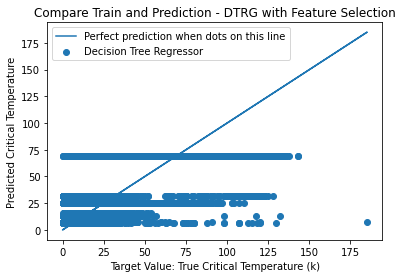

In [39]:
plt.scatter(prediction_dtrg['Y'], 
    prediction_dtrg['Y_predict'], 
    label='Decision Tree Regressor')
plt.plot(prediction_dtrg['Y'], 
    prediction_dtrg['Y'], 
    label='Perfect prediction when dots on this line')
plt.legend(loc="upper left")
plt.title('Compare Train and Prediction - DTRG with Feature Selection')
plt.xlabel('Target Value: True Critical Temperature (k)')
plt.ylabel('Predicted Critical Temperature')
plt.show()

In [40]:
rmse_train_dtrgselected = np.sqrt(sum(cost_train_dtrg)/len(cost_train_dtrg))
r2_train_dtrgselected = 1-sum(cost_train_dtrg)/sum((np.array(y)-sum(np.array(y))/len(np.array(y)))**2)

print(f'RMSE of DTRG model on training dataset = {round(rmse_train_dtrgselected,3)}')
print(f'R2 score = {round(r2_train_dtrgselected,4)}')

RMSE of DTRG model on training dataset = 20.494
R2 score = 0.6421


#### Gradient Boost

Tried Gradient Boost model fitting for over 12 hours without any conclusion. Timing can be a seriouis issue for this method. Thus, gradient boost is a discarded model. 

In [75]:
from typing import Dict, Any, List

class GradientBoostTreeRegressor(object):
    #initializer
    def __init__(self,  n_elements : int = 100, learning_rate : float = 0.01) -> None:
        self.weak_learner  = DecisionTreeRegressor(max_depth=5)
        self.n_elements    = n_elements
        self.learning_rate = learning_rate
        self.f             = []
        self.residuals     = []
        
    #destructor
    def __del__(self) -> None:
        del self.weak_learner
        del self.n_elements
        del self.learning_rate
        del self.f
        del self.residuals
    
    #public function to return model parameters
    def get_params(self, deep : bool = False) -> Dict:
        return {'weak_learner':self.weak_learner,'n_elements':self.n_elements,'learning_rate':self.learning_rate}
    
    #public function to train the ensemble
    def fit(self, X_train : np.array, y_train : np.array) -> None:
        #initialize residuals
        r = np.copy(y_train).astype(float)
        #loop through the specified number of iterations in the ensemble
        for _ in range(self.n_elements):
            #make a copy of the weak learner
            model = clone(self.weak_learner)
            #fit the weak learner on the current dataset
            model.fit(X_train,r)
            #update the residuals
            r -= self.learning_rate*model.predict(X_train)
            #append resulting model
            self.f.append(model)
            #append current mean residual
            self.residuals.append(np.mean(r))    
            
    #public function to return residuals
    def get_residuals(self) -> List:
        return(self.residuals)
    
    #public function to generate predictions
    def predict(self, X_test : np.array) -> np.array:
        #initialize output
        y_pred = np.zeros((X_test.shape[0]))
        #traverse ensemble to generate predictions
        for model in self.f:
            y_pred += self.learning_rate*model.predict(X_test)
        #return predictions
        return(y_pred)

In [88]:
features = np.array(lassoImportantfeatures[lassoImportantfeatures['importance']>=5]['feature'])
x_selected1 = x[features]
scaler_selected = StandardScaler().fit(np.array(x_selected1))
scaled_x_selected = scaler_selected.transform(x_selected1)

In [95]:
# gradBoost = GradientBoostTreeRegressor(n_elements=1000, learning_rate=1.2e-5)
# gradBoost.fit(np.array(scaled_x_selected),np.array(y))

In [84]:
# Save model
modelname = 'grad_model.sav'
if os.path.isfile(modelname):
    pass
else:
    pickle.dump(gradBoost, open(modelname,'wb'))

#### Random Forest Regressor

In [41]:
from abc import ABC,abstractmethod
from sklearn.base import clone
    
class RandomForest(ABC):
    #initializer
    def __init__(self,n_trees=100):
        self.n_trees = n_trees
        self.trees   = []
        
    #private function to make bootstrap samples
    def __make_bootstraps(self,data):
        #initialize output dictionary & unique value count
        dc   = {}
        unip = 0
        #get sample size
        b_size = data.shape[0]
        #get list of row indexes
        idx = [i for i in range(b_size)]
        #loop through the required number of bootstraps
        for b in range(self.n_trees):
            #obtain boostrap samples with replacement
            sidx   = np.random.choice(idx,replace=True,size=b_size)
            b_samp = data[sidx,:]
            #compute number of unique values contained in the bootstrap sample
            unip  += len(set(sidx))
            #obtain out-of-bag samples for the current b
            oidx   = list(set(idx) - set(sidx))
            o_samp = np.array([])
            if oidx:
                o_samp = data[oidx,:]
            #store results
            dc['boot_'+str(b)] = {'boot':b_samp,'test':o_samp}
        #return the bootstrap results
        return(dc)
  
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees}

    #protected function to obtain the right decision tree
    @abstractmethod
    def _make_tree_model(self):
        pass
    
    #protected function to train the ensemble
    def _train(self,X_train,y_train):
        #package the input data
        training_data = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
        #make bootstrap samples
        dcBoot = self.__make_bootstraps(training_data)
        #iterate through each bootstrap sample & fit a model ##
        tree_m = self._make_tree_model()
        dcOob    = {}
        for b in dcBoot:
            #make a clone of the model
            model = clone(tree_m)
            #fit a decision tree model to the current sample
            model.fit(dcBoot[b]['boot'][:,:-1],dcBoot[b]['boot'][:,-1].reshape(-1, 1))
            #append the fitted model
            self.trees.append(model)
            #store the out-of-bag test set for the current bootstrap
            if dcBoot[b]['test'].size:
                dcOob[b] = dcBoot[b]['test']
            else:
                dcOob[b] = np.array([])
        #return the oob data set
        return(dcOob)
       
    #protected function to predict from the ensemble
    def _predict(self,X):
        #check we've fit the ensemble
        if not self.trees:
            print('You must train the ensemble before making predictions!')
            return(None)
        #loop through each fitted model
        predictions = []
        for m in self.trees:
            #make predictions on the input X
            yp = m.predict(X)
            #append predictions to storage list
            predictions.append(yp.reshape(-1,1))
        #compute the ensemble prediction
        ypred = np.mean(np.concatenate(predictions,axis=1),axis=1)
        #return the prediction
        return(ypred)

#class for random forest regressor
class RandomForestRegressor(RandomForest):
    #initializer
    def __init__(self,n_trees=100,max_depth=None,min_samples_split=2,loss='mse'):
        super().__init__(n_trees)
        self.max_depth             = max_depth
        self.min_samples_split     = min_samples_split
        self.loss                  = loss
        
    #protected function to obtain the right decision tree
    def _make_tree_model(self):
        return(DecisionTreeRegressor(self.max_depth,self.min_samples_split,self.loss))
    
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees,
                'max_depth':self.max_depth,
                'min_samples_split':self.min_samples_split,
                'loss':self.loss}
    
    #train the ensemble
    def fit(self,X_train,y_train):
        #call the protected training method
        dcOob = self._train(X_train,y_train)
            
    #predict from the ensemble
    def predict(self,X):
        #call the protected prediction method
        ypred = self._predict(X)
        #return the results
        return(ypred)  

In [63]:
# rfr = RandomForestRegressor(max_depth=4)
# rfr.fit(np.array(x_selected), np.array(y).reshape(-1,1))

In [67]:
# # Save model
# modelname = 'rfr_model.sav'
# if os.path.isfile(modelname):
#     pass
# else:
#     pickle.dump(rfr, open(modelname,'wb'))

Save model for later use withouth fitting 2hrs again. 

In [68]:
# features = np.array(lassoImportantfeatures[lassoImportantfeatures['importance']>=2.95]['feature'])
# x_selected1 = x[features]
# scaler_selected = StandardScaler().fit(np.array(x_selected1))
# scaled_x_selected = scaler_selected.transform(x_selected1)

# rfr2 = RandomForestRegressor(max_depth=4)
# rfr2.fit(np.array(x_selected1), np.array(y).reshape(-1,1))

modelname = 'rfr_model.sav'
modelname2 = 'rfr_model2.sav'

# if os.path.isfile(modelname):
#     pass
# else:
#     pickle.dump(rfr2, open(modelname,'wb'))

In [70]:
# Load model
rfr = pickle.load(open(modelname,'rb'))
rfr2 = pickle.load(open(modelname2,'rb'))
# rfr2 = loaded_rfr2

In [71]:
rfr_pred_train = rfr.predict(np.array(x_selected))
cost_train_rfr = (y-rfr_pred_train)**2
prediction_rfr = pd.DataFrame({"Y": y, "Y_predict": rfr_pred_train,
                            "cost":cost_train_rfr})
prediction_rfr

,Y,Y_predict,cost
0,29.00,27.880774,1.252666
1,26.00,26.162122,0.026283
2,19.00,24.163189,26.658520
3,22.00,26.800452,23.044338
4,23.00,37.159816,200.500384
...,...,...,...
21258,2.44,12.376360,98.731241
21259,122.10,72.396865,2470.401619
21260,1.98,6.395363,19.495427
21261,1.84,6.873757,25.338705


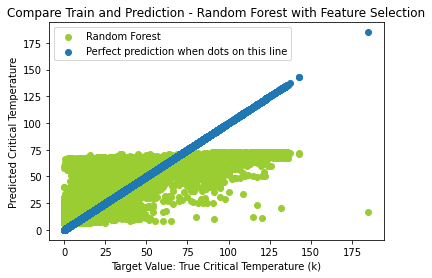

In [72]:
plt.scatter(prediction_rfr['Y'], 
    prediction_rfr['Y_predict'], 
    color = 'yellowgreen',
    label='Random Forest')
plt.scatter(prediction_rfr['Y'], 
    prediction_rfr['Y'], 
    label='Perfect prediction when dots on this line')
plt.legend(loc="upper left")
plt.title('Compare Train and Prediction - Random Forest with Feature Selection')
plt.xlabel('Target Value: True Critical Temperature (k)')
plt.ylabel('Predicted Critical Temperature')
plt.show()

In [85]:
prediction_rfr

,Y,Y_predict,cost
0,29.00,27.880774,1.252666
1,26.00,26.162122,0.026283
2,19.00,24.163189,26.658520
3,22.00,26.800452,23.044338
4,23.00,37.159816,200.500384
...,...,...,...
21258,2.44,12.376360,98.731241
21259,122.10,72.396865,2470.401619
21260,1.98,6.395363,19.495427
21261,1.84,6.873757,25.338705


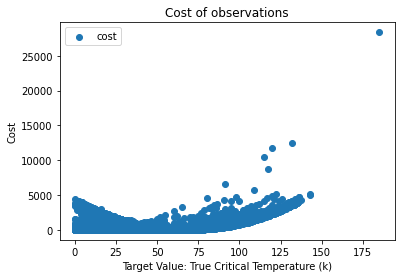

In [92]:
# plt.scatter(prediction_rfr['Y'], 
#     prediction_rfr['Y_predict'], 
#     color = 'yellowgreen',
#     label='Random Forest')
plt.scatter(prediction_rfr['Y'], 
    prediction_rfr['cost'], 
    label='cost')
plt.legend(loc="upper left")
plt.title('Cost of observations')
plt.xlabel('Target Value: True Critical Temperature (k)')
plt.ylabel('Cost')
plt.show()

In [90]:
prediction_rfr['Y_predict'].max()

72.7232129560499

In [91]:
# Percentage
y[y>=max(rfr_pred_train)].shape[0]/y.shape[0]

0.20895452193951936

In [73]:
rmse_train_rfrselected = np.sqrt(sum(cost_train_rfr)/len(cost_train_rfr))
r2_train_rfrselected = 1-sum(cost_train_rfr)/sum((np.array(y)-sum(np.array(y))/len(np.array(y)))**2)

print(f'RMSE of Random Forest model on training dataset = {round(rmse_train_rfrselected,3)}')
print(f'R2 score = {round(r2_train_rfrselected,4)}')

RMSE of Random Forest model on training dataset = 18.647
R2 score = 0.7037


### Conclusion of Modeling

Comparing Lasso regression and Decision Tree Regressor, the overall prediction looks alike, with lots of wrongly predicted datapoints on low critical temperature observations and some underestimated observations on higher critical temperature observations. 

#### Find Subset And Feature Selection

In [ ]:
def processSubset(x,y,feature_set,learningrate,epochs, q1):
    # Select features
    x = x[list(feature_set)]
    w, b, cost_list= q1.train(x, y, np.zeros(x.shape[1]), 0, learningrate=learningrate,epochs=epochs)
    # regr = model.train()
    predict = q1.predict(x=x, w=w, b=b)
    rss = ((predict-y)**2).sum()
    return {"w":w,"b":b, "RSS":rss}

def getBest(k,x,y,epo):
    results = [] 
    combo_list = []
    for combo in itertools.combinations(x.columns, k):
        results.append(processSubset(x=x,y=y,feature_set=combo,learningrate=0.01,epochs=epo))
        combo_list.append(combo)
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    models['Combo'] = combo_list
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    #print("Processed", models.shape[0], "models on", k)
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
# models_best = pd.DataFrame(columns=["w", "b","RSS","Combo"])
# for i in range(1,7):
#     models_best.loc[i] = getBest(i,x,y,epo=250)

In [ ]:
def forward(x,y,predictors, lr, epo):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in x.columns if p not in predictors]
    results = []
    combo_list = []

    for p in remaining_predictors:
        results.append(processSubset(x,y,predictors+[p], learningrate=lr, epochs=epo))
        combo_list.append(predictors+[p])
    
    # # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    models['Predictors'] = combo_list

    # # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

def backward(x,y,predictors,lr,epo):
    results = []
    combo_list = []

    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,combo,learningrate=lr, epochs=epo))
        combo_list.append(combo)
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    models['Predictors'] = combo_list
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
# models_fwd = pd.DataFrame(columns=["w", "b","RSS","Predictors"])
# predictors = []

# for i in range(1,len(features_order)):  
#     predictors = features_order[0:i]  
#     models_fwd.loc[i] = forward(x,y,predictors,lr=0.01,epo=250)

# models_fwd

# models_bwd = pd.DataFrame(columns=["w", "b","RSS","Predictors"], index = range(1,len(x.columns)))
# features_order = ['SqFt','Bathrooms','Neighborhood','Brick','Bedrooms','Offers']

# while(len(features_order) > 0):  
#     models_bwd.loc[len(features_order)] = backward(x,y,features_order,lr=0.01,epo=250)
#     features_order.pop()

# models_bwd